In [184]:
import pandas as pd

df = pd.read_csv("../results.csv")
# strip column names
df.columns = [
    col.strip() for col in df.columns
]

# For the same model, we want to split vision version from the text ones
df["player_1_model"] += ":" + df["player_1_robot_type"]
df["player_2_model"] += ":" + df["player_2_robot_type"]

df["player_1_won"] = df["player_1_won"] == "True"
df["player_2_won"] = ~df["player_1_won"]
df

,id,player_1_model,player_1_robot_type,player_1_temperature,player_2_model,player_2_robot_type,player_2_temperature,player_1_won,player_2_won
0,20241118172723,openai:gpt-4o:vision,vision,0.7,openai:gpt-4o:vision,vision,0.7,False,True
1,20241118172734,openai:gpt-4o:vision,vision,0.7,openai:gpt-4o:vision,vision,0.7,False,True
2,20241118172734,openai:gpt-4o:vision,vision,0.7,openai:gpt-4o:vision,vision,0.7,False,True
3,20241118172741,openai:gpt-4o:vision,vision,0.7,openai:gpt-4o:vision,vision,0.7,False,True
4,20241118172905,openai:gpt-4o:vision,vision,0.7,mistral:pixtral-12b-2409:text,text,0.7,False,True
...,...,...,...,...,...,...,...,...,...
540,20241120082323,anthropic:claude-3-sonnet-20240229:vision,vision,0.7,openai:gpt-4o-mini:vision,vision,0.7,False,True
541,20241120090835,mistral:pixtral-large-latest:text,text,0.7,openai:gpt-4o:text,text,0.7,False,True
542,20241120090843,anthropic:claude-3-sonnet-20240229:text,text,0.7,mistral:pixtral-large-latest:text,text,0.7,False,True
543,20241120094109,together:meta-llama/Llama-3.2-90B-Vision-Instr...,text,0.7,openai:gpt-4o:vision,vision,0.7,False,True


In [185]:
df["player_1_won"].value_counts()

player_1_won
False    545
Name: count, dtype: int64

In [186]:
# Compute the number of wins for each model 

unique_models = df["player_1_model"].unique().tolist()
unique_models += df["player_2_model"].unique().tolist()
unique_models = list(set(unique_models))

# For each model, compute the number of wins (player_1 won if it's player 1), the number of games played and the win rate
results = []
for model in unique_models:
    games_played = 0
    wins = 0
    for i, row in df.iterrows():
        if row["player_1_model"] == model and row["player_2_model"] != model:
            games_played += 1
            if row["player_1_won"]:
                wins += 1
            continue
        if row["player_2_model"] == model and row["player_1_model"] != model:
            games_played += 1
            if row["player_2_won"]:
                wins += 1
            continue
    win_rate = wins / games_played
    results.append({
        "model": model,
        "games_won": wins,
        "games_played": games_played,
        "win_rate": win_rate
    })

# Cast to df 
results_df = pd.DataFrame(results)
results_df.sort_values(by="win_rate", ascending=False, inplace=True)
results_df = results_df[results_df["games_played"] > 1]
results_df

,model,games_won,games_played,win_rate
12,openai:gpt-4o:text,70,70,1.000000
4,openai:gpt-4o-mini:vision,59,63,0.936508
11,openai:gpt-4o-mini:text,59,77,0.766234
13,mistral:pixtral-12b-2409:vision,46,63,0.730159
5,mistral:pixtral-large-latest:vision,45,70,0.642857
10,mistral:pixtral-12b-2409:text,52,91,0.571429
0,together:meta-llama/Llama-3.2-90B-Vision-Instr...,8,15,0.533333
9,openai:gpt-4o:vision,43,108,0.398148
2,anthropic:claude-3-sonnet-20240229:vision,23,58,0.396552
6,anthropic:claude-3-haiku-20240307:vision,34,86,0.395349


In [187]:
print(results_df.to_markdown())

|    | model                                                          |   games_won |   games_played |   win_rate |
|---:|:---------------------------------------------------------------|------------:|---------------:|-----------:|
| 12 | openai:gpt-4o:text                                             |          70 |             70 |   1        |
|  4 | openai:gpt-4o-mini:vision                                      |          59 |             63 |   0.936508 |
| 11 | openai:gpt-4o-mini:text                                        |          59 |             77 |   0.766234 |
| 13 | mistral:pixtral-12b-2409:vision                                |          46 |             63 |   0.730159 |
|  5 | mistral:pixtral-large-latest:vision                            |          45 |             70 |   0.642857 |
| 10 | mistral:pixtral-12b-2409:text                                  |          52 |             91 |   0.571429 |
|  0 | together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text   | 

In [196]:
results = []

for model_1 in unique_models:
    for model_2 in unique_models:
        games_played = 0
        wins = 0
        for i, row in df.iterrows():
            if row["player_1_model"] == model_1 and row["player_2_model"] == model_2 and model_1 != model_2:
                games_played += 1
                if row["player_1_won"]:
                    wins += 1
                continue
            if row["player_2_model"] == model_1 and row["player_1_model"] == model_2 and model_1 != model_2:
                games_played += 1
                if row["player_2_won"]:
                    wins += 1
                continue
        try:
            win_rate = wins / games_played
        except:
            win_rate = 0
        results.append({
            "model_1": model_1,
            "model_2": model_2,
            "games_won": wins,
            "games_played": games_played,
            "win_rate": win_rate
        })
results_df = pd.DataFrame(results)
results_df = results_df[results_df["games_played"] > 1]
print(results_df.to_markdown())

|     | model_1                                                        | model_2                                                        |   games_won |   games_played |   win_rate |
|----:|:---------------------------------------------------------------|:---------------------------------------------------------------|------------:|---------------:|-----------:|
|   3 | together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text   | mistral:pixtral-large-latest:text                              |           1 |              2 |  0.5       |
|   8 | together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text   | anthropic:claude-3-sonnet-20240229:text                        |           7 |              7 |  1         |
|  16 | together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:vision | anthropic:claude-3-sonnet-20240229:vision                      |           0 |              5 |  0         |
|  17 | together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:vision | mistral:pixtral-l

In [197]:
# Display results df in a matrix

results_matrix = results_df.pivot(index="model_1", columns="model_2", values="win_rate")

In [198]:
print(results_matrix.to_markdown())

| model_1                                                        |   anthropic:claude-3-haiku-20240307:text |   anthropic:claude-3-haiku-20240307:vision |   anthropic:claude-3-sonnet-20240229:text |   anthropic:claude-3-sonnet-20240229:vision |   mistral:pixtral-12b-2409:text |   mistral:pixtral-12b-2409:vision |   mistral:pixtral-large-latest:text |   mistral:pixtral-large-latest:vision |   openai:gpt-4o-mini:text |   openai:gpt-4o-mini:vision |   openai:gpt-4o:text |   openai:gpt-4o:vision |   together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text |   together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:vision |
|:---------------------------------------------------------------|-----------------------------------------:|-------------------------------------------:|------------------------------------------:|--------------------------------------------:|--------------------------------:|----------------------------------:|------------------------------------:|-----------------

In [199]:
#We want to select the matches that did not happen. 
# Filter results_matrix to only keep the NaN values
results_matrix.isna()
# We want to get the index of lines and columns that are True
missing_matches = results_matrix.isna().stack()[lambda x: x].index.tolist()

# We want to delete the matches with same values
missing_matches = [match for match in missing_matches if match[0] != match[1]]

# We want to remove symetrc redudant matches
missing_matches_unique = []
for match in missing_matches:
    if (match[1], match[0]) not in missing_matches_unique:
        missing_matches_unique.append(match)

print(missing_matches_unique)







[('anthropic:claude-3-haiku-20240307:text', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'), ('anthropic:claude-3-haiku-20240307:vision', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'), ('anthropic:claude-3-sonnet-20240229:vision', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'), ('mistral:pixtral-12b-2409:text', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'), ('mistral:pixtral-12b-2409:vision', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'), ('mistral:pixtral-large-latest:vision', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'), ('openai:gpt-4o-mini:text', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'), ('openai:gpt-4o-mini:vision', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'), ('openai:gpt-4o:text', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'), ('openai:gpt-4o:vision', 'together:meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo:text'),

In [200]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


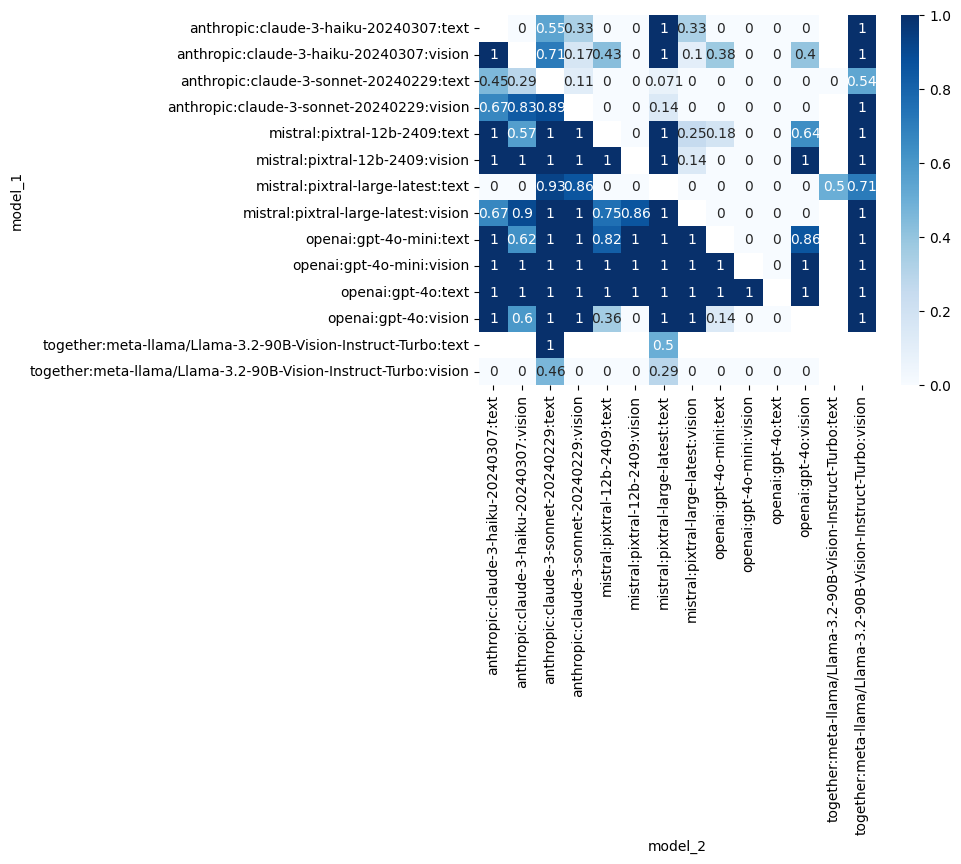

In [201]:
# Make a heatmap
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(results_matrix, annot=True, 
            # cmap from white to blue
            cmap="Blues",
            )
# plt.xticks(rotation=-45)

plt.show()